In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [37]:
#carga de dataset archivo
#dataset_titanic = pd.read_csv("C:/Users/hevas/Downloads/data_titanic_proyecto.csv", sep=',')
dataset_titanic = pd.read_csv("C:/Users/hevas/Downloads/lab_titanic/train.csv", sep=',')
dataset_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
dataset_titanic.shape

(891, 12)

In [11]:
dataset_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
dataset_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
dataset_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
dataset_titanic.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [38]:
dataset_titanic['Survived'].unique()

array([0, 1], dtype=int64)

In [17]:
#dataset_titanic['no_passenger_survived'] = dataset_titanic['Survived'].map( {'Y': 1, 'N': 0})
#dataset_titanic['no_passenger_survived'].unique()

N: No sobrevive: 549
S: Sobrevive: 342
Proporción: 1.61 : 1


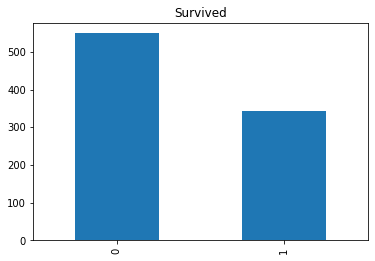

In [19]:
#sns.factorplot('passenger_survived', data=dataset_titanic,kind="count")

# Detección del desbalance de la muestras
target_count = dataset_titanic.Survived.value_counts()
print('N: No sobrevive:', target_count[0])
print('S: Sobrevive:', target_count[1])
print('Proporción:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Survived');

C:\Users\hevas\anaconda3\envs\educacion\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hevas\anaconda3\envs\educacion\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Survived               
          count  sum      mean
Sex                           
female      314  233  0.742038
male        577  109  0.188908

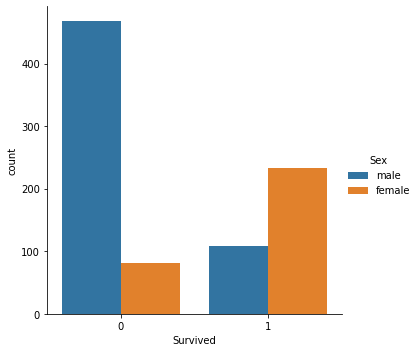

In [39]:
sns.factorplot('Survived', data=dataset_titanic, hue='Sex',kind="count")

dataset_titanic[['Sex','Survived']].groupby(['Sex'], as_index=False).agg(['count','sum','mean'])

C:\Users\hevas\anaconda3\envs\educacion\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\hevas\anaconda3\envs\educacion\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


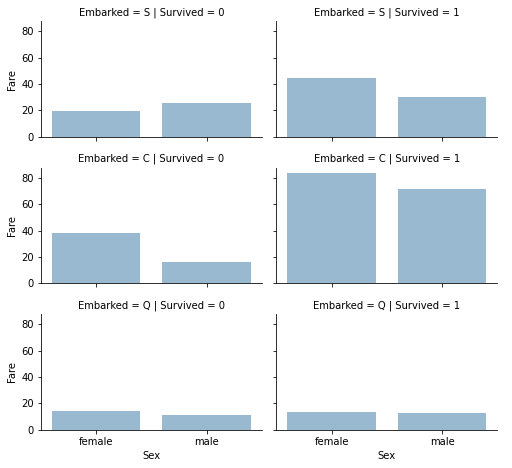

In [40]:
grid = sns.FacetGrid(dataset_titanic, row='Embarked', col='Survived', size = 2.2, aspect = 1.6)
grid.map(sns.barplot, 'Sex','Fare', alpha = .5, ci=None)
grid.add_legend()

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

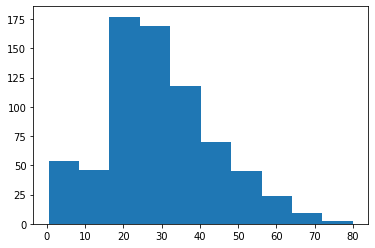

In [41]:
plt.hist(dataset_titanic.Age)

In [42]:
dataset_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [43]:
dataset_titanic.drop(['Name','PassengerId','Cabin','Ticket'], axis='columns', inplace=True)

In [53]:
dataset_titanic.Sex.unique()

array(['male', 'female'], dtype=object)

In [46]:
# Imputamos la variable Embarked con la moda
dataset_titanic['Embarked'].fillna(dataset_titanic['Embarked'].mode()[0], inplace=True)
print("Valores perdidos en num-of-doors: " + 
      str(dataset_titanic['Embarked'].isnull().sum()))

Valores perdidos en num-of-doors: 0


In [49]:
dataset_titanic['Embarked'] = dataset_titanic['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2})

In [51]:
dataset_titanic['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [30]:
#dataset_titanic['Pclass'] = dataset_titanic['Pclass'].map( {'Lower': 0, 'Upper': 1, 'Middle': 2})

In [54]:
dataset_titanic['Sex'] = dataset_titanic['Sex'].map( {'male': 0, 'female': 1})

In [57]:
age_avg = dataset_titanic['Age'].mean()
age_std = dataset_titanic['Age'].std()
age_null_count = dataset_titanic['Age'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)

conValoresNulos = np.isnan(dataset_titanic['Age'])

dataset_titanic.loc[np.isnan(dataset_titanic['Age']), 'Age'] = age_null_random_list
dataset_titanic['Age'] = dataset_titanic['Age'].astype(int)
print("Edad Promedio: " + str(age_avg))
print("Desvió Std Edad: " + str(age_std))
print("Intervalo para asignar edad aleatoria: " + str(int(age_avg - age_std)) + " a " + str(int(age_avg + age_std)))

Edad Promedio: 29.69911764705882
Desvió Std Edad: 14.526497332334042
Intervalo para asignar edad aleatoria: 15 a 44


In [58]:
dataset_titanic.loc[ dataset_titanic['Age'] <= 16, 'edadEncoded']  = 0
dataset_titanic.loc[(dataset_titanic['Age'] > 16) & (dataset_titanic['Age'] <= 32), 'edadEncoded'] = 1
dataset_titanic.loc[(dataset_titanic['Age'] > 32) & (dataset_titanic['Age'] <= 48), 'edadEncoded'] = 2
dataset_titanic.loc[(dataset_titanic['Age'] > 48) & (dataset_titanic['Age'] <= 64), 'edadEncoded'] = 3
dataset_titanic.loc[ dataset_titanic['Age'] > 64, 'edadEncoded'] = 4

In [60]:
dataset_titanic['edadEncoded'] = dataset_titanic['edadEncoded'].astype(int)

In [36]:
#dataset_titanic.drop(['passenger_survived'], axis='columns', inplace=True)

In [61]:
dataset_titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,edadEncoded
0,0,3,0,22,1,0,7.2500,0,1
1,1,1,1,38,1,0,71.2833,1,2
2,1,3,1,26,0,0,7.9250,0,1
3,1,1,1,35,1,0,53.1000,0,2
4,0,3,0,35,0,0,8.0500,0,2
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13.0000,0,1
887,1,1,1,19,0,0,30.0000,0,1
888,0,3,1,39,1,2,23.4500,0,2
889,1,1,0,26,0,0,30.0000,1,1


In [62]:
correlaciones = dataset_titanic.corr()
correlaciones

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,edadEncoded
Survived,1.000000,-0.338481,0.543351,-0.065244,-0.035322,0.081629,0.257307,0.106811,-0.061270
Pclass,-0.338481,1.000000,-0.131900,-0.317009,0.083081,0.018443,-0.549500,0.045702,-0.310538
Sex,0.543351,-0.131900,1.000000,-0.076074,0.114631,0.245489,0.182333,0.116569,-0.073420
Age,-0.065244,-0.317009,-0.076074,1.000000,-0.205579,-0.163494,0.087261,0.010868,0.940417
SibSp,-0.035322,0.083081,0.114631,-0.205579,1.000000,0.414838,0.159651,-0.059961,-0.187720
Parch,0.081629,0.018443,0.245489,-0.163494,0.414838,1.000000,0.216225,-0.078665,-0.141275
Fare,0.257307,-0.549500,0.182333,0.087261,0.159651,0.216225,1.000000,0.062142,0.101647
Embarked,0.106811,0.045702,0.116569,0.010868,-0.059961,-0.078665,0.062142,1.000000,0.007765
edadEncoded,-0.061270,-0.310538,-0.073420,0.940417,-0.187720,-0.141275,0.101647,0.007765,1.000000


<AxesSubplot:>

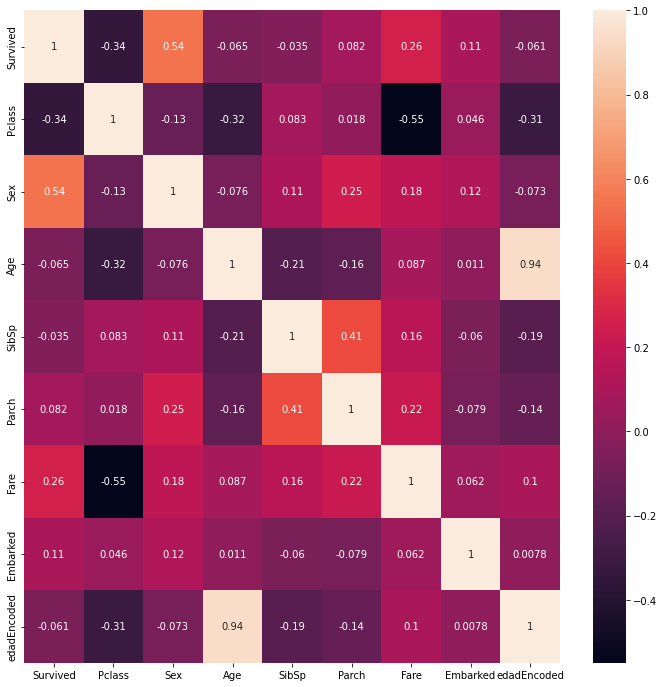

In [63]:
#mapa de correlacion
plt.figure(figsize=(12,12))
sns.heatmap(correlaciones,annot = True)

In [64]:
from sklearn.feature_selection import SelectKBest

In [65]:
X = dataset_titanic[['edadEncoded','SibSp','Parch','Fare','Embarked','Pclass','Sex','Age']]
y = dataset_titanic['Survived']

best=SelectKBest(k=3)
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['Fare', 'Pclass', 'Sex'], dtype='object')


In [84]:
#X = dataset_titanic.iloc[:, dataset_titanic.columns != 'Survived']
#y = dataset_titanic.loc[:, 'Survived']

X = dataset_titanic[['Fare', 'Pclass', 'Sex']]
y = dataset_titanic['Survived']

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [70]:
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)

In [86]:
#partición de data para entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [87]:
X_train.shape #filas, columnas

(623, 3)

In [192]:
X_train

,Fare,Pclass,Sex
704,7.8542,3,0
882,10.5167,3,1
661,7.2250,3,0
431,16.1000,3,1
830,14.4542,3,1
...,...,...,...
368,7.7500,3,1
62,83.4750,1,0
198,7.7500,3,1
562,13.5000,2,0


Descripción de Arquitectura de Red con Keras

In [73]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [162]:
inputs = X_train.shape[1]

#base secuencial para definir la estructura de la Red (SIEMPRE INICIAR CON SQUENTIAL)
clasificador = Sequential()

#input_dim = numero de columnas del dataset
#units = cantidad de neuronas que tendra la red
#primera capa oclta
clasificador.add(Dense(input_dim = inputs, units = 10, activation='relu', kernel_initializer='uniform'))

#segunda capa oculta
#clasificador.add(Dense(units=6, activation='relu', kernel_initializer='uniform'))

#capa de salida
clasificador.add(Dense(units=1, activation='sigmoid', kernel_initializer='uniform'))

In [175]:
#parametros de optimización
clasificador.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

#parametros de entrenamiento.
clasificador.fit(X_train, y_train, batch_size=25, epochs = 750)

Epoch 1/750
25/25 [==============================] - 1s 3ms/step - loss: 0.5164 - accuracy: 0.7608
Epoch 2/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4982 - accuracy: 0.7576
Epoch 3/750
25/25 [==============================] - 0s 3ms/step - loss: 0.5007 - accuracy: 0.7753
Epoch 4/750
25/25 [==============================] - 0s 3ms/step - loss: 0.5242 - accuracy: 0.7576
Epoch 5/750
25/25 [==============================] - 0s 3ms/step - loss: 0.5094 - accuracy: 0.7673
Epoch 6/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4877 - accuracy: 0.7560
Epoch 7/750
25/25 [==============================] - 0s 3ms/step - loss: 0.5034 - accuracy: 0.7817
Epoch 8/750
25/25 [==============================] - 0s 3ms/step - loss: 0.5034 - accuracy: 0.7737
Epoch 9/750
25/25 [==============================] - 0s 3ms/step - loss: 0.5002 - accuracy: 0.7576
Epoch 10/750
25/25 [==============================] - 0s 3ms/step - loss: 0.5032 - accuracy: 0.7865
Epoch 11/

25/25 [==============================] - 0s 3ms/step - loss: 0.4942 - accuracy: 0.7592
Epoch 84/750
25/25 [==============================] - 0s 3ms/step - loss: 0.5097 - accuracy: 0.7753
Epoch 85/750
25/25 [==============================] - 0s 3ms/step - loss: 0.5142 - accuracy: 0.7657
Epoch 86/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4852 - accuracy: 0.7624
Epoch 87/750
25/25 [==============================] - 0s 3ms/step - loss: 0.5044 - accuracy: 0.7657
Epoch 88/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4864 - accuracy: 0.7624
Epoch 89/750
25/25 [==============================] - 0s 3ms/step - loss: 0.5448 - accuracy: 0.7544
Epoch 90/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4933 - accuracy: 0.7769
Epoch 91/750
25/25 [==============================] - 0s 3ms/step - loss: 0.5547 - accuracy: 0.7592
Epoch 92/750
25/25 [==============================] - 0s 2ms/step - loss: 0.4997 - accuracy: 0.7705
Epoch 93/750


25/25 [==============================] - 0s 3ms/step - loss: 0.4769 - accuracy: 0.7753
Epoch 165/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4991 - accuracy: 0.7608
Epoch 166/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4963 - accuracy: 0.7817
Epoch 167/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4862 - accuracy: 0.7689
Epoch 168/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4924 - accuracy: 0.7721
Epoch 169/750
25/25 [==============================] - 0s 3ms/step - loss: 0.5015 - accuracy: 0.7624
Epoch 170/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4750 - accuracy: 0.7737
Epoch 171/750
25/25 [==============================] - 0s 3ms/step - loss: 0.5082 - accuracy: 0.7673
Epoch 172/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4960 - accuracy: 0.7705
Epoch 173/750
25/25 [==============================] - 0s 3ms/step - loss: 0.5057 - accuracy: 0.7560
Epoc

25/25 [==============================] - 0s 3ms/step - loss: 0.4833 - accuracy: 0.7721
Epoch 246/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4836 - accuracy: 0.7624
Epoch 247/750
25/25 [==============================] - 0s 2ms/step - loss: 0.4911 - accuracy: 0.7753
Epoch 248/750
25/25 [==============================] - 0s 2ms/step - loss: 0.4904 - accuracy: 0.7833
Epoch 249/750
25/25 [==============================] - 0s 2ms/step - loss: 0.4845 - accuracy: 0.7769
Epoch 250/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4800 - accuracy: 0.7833
Epoch 251/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4808 - accuracy: 0.7913
Epoch 252/750
25/25 [==============================] - 0s 3ms/step - loss: 0.5096 - accuracy: 0.7689
Epoch 253/750
25/25 [==============================] - 0s 2ms/step - loss: 0.4966 - accuracy: 0.7689
Epoch 254/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4840 - accuracy: 0.7705
Epoc

25/25 [==============================] - 0s 3ms/step - loss: 0.4846 - accuracy: 0.7640
Epoch 327/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4922 - accuracy: 0.7657
Epoch 328/750
25/25 [==============================] - 0s 2ms/step - loss: 0.5528 - accuracy: 0.7640
Epoch 329/750
25/25 [==============================] - 0s 2ms/step - loss: 0.4744 - accuracy: 0.7769
Epoch 330/750
25/25 [==============================] - 0s 2ms/step - loss: 0.4923 - accuracy: 0.7640
Epoch 331/750
25/25 [==============================] - 0s 2ms/step - loss: 0.4693 - accuracy: 0.7801
Epoch 332/750
25/25 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 0.7737
Epoch 333/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4826 - accuracy: 0.7849
Epoch 334/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4805 - accuracy: 0.7753
Epoch 335/750
25/25 [==============================] - 0s 2ms/step - loss: 0.4986 - accuracy: 0.7737
Epoc

25/25 [==============================] - 0s 3ms/step - loss: 0.4859 - accuracy: 0.7769
Epoch 408/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4810 - accuracy: 0.7657
Epoch 409/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4814 - accuracy: 0.7753
Epoch 410/750
25/25 [==============================] - 0s 5ms/step - loss: 0.4807 - accuracy: 0.7865
Epoch 411/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4797 - accuracy: 0.7801
Epoch 412/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4829 - accuracy: 0.7833
Epoch 413/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4790 - accuracy: 0.7865
Epoch 414/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4760 - accuracy: 0.7833
Epoch 415/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4924 - accuracy: 0.7673
Epoch 416/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4784 - accuracy: 0.7785
Epoc

25/25 [==============================] - 0s 3ms/step - loss: 0.4844 - accuracy: 0.7624
Epoch 489/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4845 - accuracy: 0.7657
Epoch 490/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4884 - accuracy: 0.7689
Epoch 491/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4952 - accuracy: 0.7705
Epoch 492/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4729 - accuracy: 0.7753
Epoch 493/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4805 - accuracy: 0.7769
Epoch 494/750
25/25 [==============================] - 0s 2ms/step - loss: 0.4798 - accuracy: 0.7737
Epoch 495/750
25/25 [==============================] - 0s 3ms/step - loss: 0.5069 - accuracy: 0.7608
Epoch 496/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4811 - accuracy: 0.7913
Epoch 497/750
25/25 [==============================] - 0s 2ms/step - loss: 0.5059 - accuracy: 0.7576
Epoc

25/25 [==============================] - 0s 3ms/step - loss: 0.5025 - accuracy: 0.7817
Epoch 570/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4961 - accuracy: 0.7657
Epoch 571/750
25/25 [==============================] - 0s 3ms/step - loss: 0.5244 - accuracy: 0.7448
Epoch 572/750
25/25 [==============================] - 0s 3ms/step - loss: 0.5294 - accuracy: 0.7432
Epoch 573/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4718 - accuracy: 0.7721
Epoch 574/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4899 - accuracy: 0.7640
Epoch 575/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4884 - accuracy: 0.7721
Epoch 576/750
25/25 [==============================] - 0s 4ms/step - loss: 0.4888 - accuracy: 0.7673
Epoch 577/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4919 - accuracy: 0.7657
Epoch 578/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4743 - accuracy: 0.7817
Epoc

25/25 [==============================] - 0s 3ms/step - loss: 0.5487 - accuracy: 0.7303
Epoch 651/750
25/25 [==============================] - 0s 4ms/step - loss: 0.4947 - accuracy: 0.7817
Epoch 652/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4911 - accuracy: 0.7705
Epoch 653/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4724 - accuracy: 0.7721
Epoch 654/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4695 - accuracy: 0.8026
Epoch 655/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4804 - accuracy: 0.7865
Epoch 656/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4752 - accuracy: 0.7769
Epoch 657/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4754 - accuracy: 0.7785
Epoch 658/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4853 - accuracy: 0.7881
Epoch 659/750
25/25 [==============================] - 0s 2ms/step - loss: 0.4730 - accuracy: 0.7801
Epoc

25/25 [==============================] - 0s 3ms/step - loss: 0.4780 - accuracy: 0.7769
Epoch 732/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4974 - accuracy: 0.7657
Epoch 733/750
25/25 [==============================] - 0s 2ms/step - loss: 0.4676 - accuracy: 0.7753
Epoch 734/750
25/25 [==============================] - 0s 2ms/step - loss: 0.4680 - accuracy: 0.7817
Epoch 735/750
25/25 [==============================] - 0s 2ms/step - loss: 0.4644 - accuracy: 0.7865
Epoch 736/750
25/25 [==============================] - 0s 2ms/step - loss: 0.4720 - accuracy: 0.7721
Epoch 737/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4785 - accuracy: 0.7961
Epoch 738/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4834 - accuracy: 0.7769
Epoch 739/750
25/25 [==============================] - 0s 3ms/step - loss: 0.4963 - accuracy: 0.7769
Epoch 740/750
25/25 [==============================] - 0s 2ms/step - loss: 0.4768 - accuracy: 0.7737
Epoc

In [176]:
# Guardardamos la red.
path = 'C:/Users/hevas/Downloads/lab_titanic/' 
clasificador.save(path + '6_6_sig_out.h5')

In [177]:
# Cargamos la red.
new_model = keras.models.load_model(path + '6_6_sig_out.h5')

In [178]:
#predicciones
y_preds = new_model.predict(X_test)
y_preds

9/9 [==============================] - 0s 3ms/step


array([[0.3955375 ],
       [0.56765   ],
       [0.2282343 ],
       [0.10644487],
       [0.6133142 ],
       [0.8935808 ],
       [0.47685072],
       [0.59751374],
       [0.10723119],
       [0.13957518],
       [0.10723119],
       [0.13395226],
       [0.11465825],
       [0.10308627],
       [0.64654255],
       [0.10824236],
       [0.6190815 ],
       [0.22928132],
       [0.10295516],
       [0.11710428],
       [0.10742204],
       [0.49246973],
       [0.8519351 ],
       [0.6133142 ],
       [0.23090093],
       [0.13957518],
       [0.14045224],
       [0.13957518],
       [0.10308627],
       [0.10824236],
       [0.89571494],
       [0.6133142 ],
       [0.860928  ],
       [0.14029959],
       [0.1403235 ],
       [0.13479635],
       [0.39578766],
       [0.10628279],
       [0.11031725],
       [0.9698248 ],
       [0.6133142 ],
       [0.8876427 ],
       [0.395343  ],
       [0.6674886 ],
       [0.22928132],
       [0.6897146 ],
       [0.13285299],
       [0.136

In [179]:
y_preds = (y_preds >= 0.5)
y_preds

array([[False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [

In [81]:
from sklearn.metrics import accuracy_score

In [180]:
accuracy_score(y_test, y_preds)

0.8134328358208955

In [181]:
#KFolds
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [186]:
def red_v1():
  #base secuencial para definir la estructura de la Red (SIEMPRE INICIAR CON SQUENTIAL)
  clasificador = Sequential()

  #primera capa oclta
  clasificador.add(Dense(input_dim = 3, units=6, activation='relu', kernel_initializer='uniform'))

  #segunda capa oculta
  clasificador.add(Dense(units=6, activation='relu', kernel_initializer='uniform'))

  #capa de salida
  clasificador.add(Dense(units=1, activation='sigmoid', kernel_initializer='uniform'))

  #parametros de optimización
  clasificador.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

  return clasificador

In [187]:
clasificador = KerasClassifier(build_fn=red_v1, batch_size=25, nb_epoch = 500)

C:\Users\hevas\AppData\Local\Temp\ipykernel_3156\2711675060.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clasificador = KerasClassifier(build_fn=red_v1, batch_size=25, nb_epoch = 500)


In [188]:
kfolds = KFold(n_splits=10, shuffle=True)

accs = cross_val_score(clasificador, X=X_train, y=y_train, cv=kfolds, verbose=1, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.6s finished


In [189]:
accs

array([0.63492066, 0.63492066, 0.53968257, 0.53225809, 0.51612902,
       0.58064514, 0.72580647, 0.59677422, 0.56451613, 0.64516127])

In [190]:
accs.mean()

0.5970814228057861

In [193]:
#carga de dataset archivo de test
datatest_titanic = pd.read_csv("C:/Users/hevas/Downloads/lab_titanic/test.csv", sep=',')
datatest_titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [194]:
test = datatest_titanic[['Fare','Pclass','Sex']]

In [196]:
test['Sex'] = test['Sex'].map( {'male': 0, 'female': 1})
test

C:\Users\hevas\AppData\Local\Temp\ipykernel_3156\2358349221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Sex'] = test['Sex'].map( {'male': 0, 'female': 1})


,Fare,Pclass,Sex
0,7.8292,3,0
1,7.0000,3,1
2,9.6875,2,0
3,8.6625,3,0
4,12.2875,3,1
...,...,...,...
413,8.0500,3,0
414,108.9000,1,1
415,7.2500,3,0
416,8.0500,3,0


In [197]:
#predicciones
y_preds = new_model.predict(test)
y_preds

14/14 [==============================] - 0s 3ms/step


array([[0.10679705],
       [0.6176427 ],
       [0.23142906],
       [0.11234186],
       [0.58676577],
       [0.11622553],
       [0.6140126 ],
       [0.2277962 ],
       [0.61632186],
       [0.13607703],
       [0.10723119],
       [0.36638445],
       [0.8900515 ],
       [0.22657181],
       [0.93249816],
       [0.8465631 ],
       [0.22970161],
       [0.10292869],
       [0.6123016 ],
       [0.61634606],
       [0.3845879 ],
       [0.08005094],
       [0.96593785],
       [0.3856774 ],
       [0.6594006 ],
       [0.14027941],
       [0.9312532 ],
       [0.10292869],
       [0.36881617],
       [0.13714279],
       [0.22657181],
       [0.22882006],
       [0.53705883],
       [0.51958907],
       [0.38368052],
       [0.10295516],
       [0.6115778 ],
       [0.6080236 ],
       [0.11816633],
       [0.13741907],
       [0.14075789],
       [0.36668128],
       [0.1069325 ],
       [0.8876427 ],
       [0.9445875 ],
       [0.10742204],
       [0.36838335],
       [0.106

In [198]:
y_preds = (y_preds >= 0.5)
y_preds

array([[False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [